# Transformaciones espaciales en imágenes:
<span style="font-family: 'Verdana'; color: red;"> *Bronquivoide* </span>


### Una transformación espacial es un operador que transforma la estructura geométrica de un sistema de acuerdo a una ecuación definida. 

### En el contexto del procesamiento de imágenes estas transformaciones modifican la geometría de la imagen cambiando la configuración espacial de los pixeles. No cambian los valores de la intensidad asociados a los pixeles, únicamente cambian la relación espacial entre pixeles.

### En este notebook se tiene como objetivo estudiar estas transformaciones mediante la librería OpenCV.

# Brevísima introducción:

### El tipo de transformaciones espaciales (o geométricas) que más se utiliza normalmente es el llamado *transformación afín (affine transformation)*. Una transformación afín es un mapeo lineal descrito como sigue.

### Consideremos un espacio vectorial sobre un campo $K$ de dimensión $n$ denotado por $K^n$. Una transformación afín es una transformación lineal $T: K^n \rightarrow K^n$ que opera mediante:

<font size="5"> $T(\vec{x})=A \vec{x} + \vec{\tau}=\vec{x}'$</font>

### En donde $\vec{x}$ y $\vec{\tau} \in K^n$, $A \in M_{n \times n} (K)$.

### Podemos escribir la ecuación anterior usando una matriz y un vector aumentado como sigue:
 <font size="5"> $\begin{pmatrix}
\vec{x}' \\
1
\end{pmatrix}=\begin{pmatrix}
A & | & \vec{0} \\
\vec{\tau} & | & 1
\end{pmatrix} \cdot \begin{pmatrix}
\vec{x} \\
1
\end{pmatrix}$</font>

### Dentro del procesamiento de imágenes sabemos que una imagen se representa como una función bidimensional, por lo que sería útil abordar una analogía para el análisis partiendo de ver el caso particular en que $n=2$ y $K^2 = \mathbb{R}^2$. En donde $\vec{x}= \begin{pmatrix}
x \\
y
\end{pmatrix}$, $\vec{\tau}= \begin{pmatrix}
\tau_x \\
\tau_y
\end{pmatrix}$

### Bajo estas condiciones podemos ver a la transformación afin mediante la ecuación:

<font size="5"> $\begin{pmatrix}
x' \\
y'  \\
1
\end{pmatrix}=\begin{pmatrix}
a_{11} & a_{12} & 0 \\
a_{21} & a_{22} & 0 \\
\tau_x & \tau_y & 1
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}= T\begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}$ </font>

### Dentro del procesamiento de imágenes definimos cuatro transformaciones espaciales:

### 1) Traslación.

### 2) Rotación.

### 3) Escalamiento: El cual puede ser dividido en dos: Acercamiento (*zooming*) y  Encogimiento (*shrinking*)

### 4) Recorte (*cropping* o *shear*)

### Vamos a describir estos procesos bajo el caracter de transformación afín, en su analogía con $\mathbb{R}^2$ dada la representación de una imagen mediante una función bidimensional:

# $\blacksquare $ Traslación: 

### Esta transformación consiste en ver la relación entre un punto $P$ (un pixel) dado un sistema coordenado $S$ tal que queremos transformar $P(x,y)$ a un sistema coordenado $S'$ desplazado por $\tau$ unidades espaciales con respecto al origen de $S$. Es decir, queremos ver la relación entre $P(x,y)$ y $P(x',y')$.  

### Tenemos la siguiente transformación afín asociada:

<font size="5"> $\begin{pmatrix}
x' \\
y'  \\
1
\end{pmatrix}=\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
\tau_x & \tau_y & 1
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}= T\begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}$ </font>

### Bajo las ecuaciones de transformación:

<font size="5"> $\begin{cases}
x'=x + \tau_x \\
y'=y + \tau_y
\end{cases}$ </font>

# $\blacksquare $ Rotación: 

### Aunque tenemos rotaciones directas e inversas para sistemas coordenados derechos e izquierdos, nos vamos a centrar en las directas para derechos. Aquí queremos encontrar la relación entre $S$ y $S'$ tal que los ejes de $S'$ son perpendiculares a los de $S$ formando un ángulo $\theta$ de rotación entre sistemas.

### La transformación es:

<font size="5"> $\begin{pmatrix}
x' \\
y'  \\
1
\end{pmatrix}=\begin{pmatrix}
cos \theta & sen \theta & 0 \\
-sen \theta & cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}= R\begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}$ </font>

### Bajo las ecuaciones:

<font size="5"> $\begin{cases}
x'=xcos\theta -ysen\theta \\
y'=xcos\theta +ysen\theta 
\end{cases}$ </font>

# $\blacksquare $ Escalamiento: 

### Todos los puntos de pares coordenados que forman una imagen $S$, son escalados convirtiendo a la imagen en un sistema escalado $S'$ aplicando los factores de escala $C_x, C_y$ a $(x,y)$.

### Tenemos la tranformación:

<font size="5"> $\begin{pmatrix}
x' \\
y'  \\
1
\end{pmatrix}=\begin{pmatrix}
C_x & 0 & 0 \\
0 & C_y & 0 \\
0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}= S\begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}$ </font>

### Mediante las ecuaciones:

<font size="5"> $\begin{cases}
x'=C_x \cdot x\\
y'=C_y \cdot y
\end{cases}$ </font>

### Dependiendo de la magnitud de los factores se va a tener un agrandamiento o un encogimiento.

# $\blacksquare $ Corte: 

### Tenemos una transformación similar a la anterior, pero asignando valores a términos fuera de la diagonal. Tenemos dos variantes de esta transformación que te relacionan $S$ y $S'$: vertical y horizontal.

### La transformación corte vertical se opera a lo largo del eje $x$ para calcular $x'$, en donde $y'$ va a permanecer constante.

### La transformación corte horizontal se opera a lo largo del eje $y$ para calcular $y'$, en donde $x'$ va a permanecer constante. 

### $\circ$Vertical:

<font size="5"> $\begin{pmatrix}
x' \\
y'  \\
1
\end{pmatrix}=\begin{pmatrix}
1 & 0 & 0 \\
s_v & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}= C_v\begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}$ </font>

### Mediante las ecuaciones:

<font size="5"> $\begin{cases}
x'=x+s_v y\\
y'= y
\end{cases}$ </font>

### $\circ$ Horizontal:

<font size="5"> $\begin{pmatrix}
x' \\
y'  \\
1
\end{pmatrix}=\begin{pmatrix}
1 & s_h & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}= C_h\begin{pmatrix}
x \\
y  \\
1
\end{pmatrix}$ </font>

### Mediante las ecuaciones:

<font size="5"> $\begin{cases}
x'=x\\
y'= s_h x+y
\end{cases}$ </font>

# Ejercicio:

### Implementar estas transformaciones a la imagen *Leopardo.jpg* usando OpenCV.

### Nota: 

### Las matrices de transformación que fueron expuestas anteriormente en la introducción, son en términos de coordenadas homogéneas $(x,y,1)$ de un vector de dos coordenadas $(x,y)$, dando lugar a matrices de $3\times 3$. OpenCV aborda las matrices de transformación de manera distinta, pues toma las coordenadas $(x,y)$ de los pixeles dando lugar a matrices para las transformaciones de $2\times 3$.

# $\blacksquare$ Traslación sobre Leopardo.jpg:

### Se va a usar la función *cv2.warpAffine* cuyos argumentos reciben cv2.warpAffine(imagen , matriz de transformación , tamaño de la imagen: ancho y largo, en ese orden). La matriz que recibe esta función no es de la forma que habíamos visto con respecto a la transformación:

<font size="5"> $\begin{pmatrix}
\vec{x}' \\
1
\end{pmatrix}=\begin{pmatrix}
A & | & \vec{0} \\
\vec{\tau} & | & 1
\end{pmatrix} \cdot \begin{pmatrix}
\vec{x} \\
1
\end{pmatrix}$</font>

### Sino es una matriz asociada a la transformación de la forma:
<font size="5"> $
\vec{x}'
=\begin{pmatrix}
A | &  \vec{\tau} 
\end{pmatrix} 
\vec{x} $</font>

### Que en dos dimensiones la escribimos como:

<font size="5"> $\begin{pmatrix}
x' \\
y
\end{pmatrix}=\begin{pmatrix}
a_{00} & a_{01} & \tau_x \\
a_{10} & a_{11} & \tau_y
\end{pmatrix} \cdot \begin{pmatrix}
x \\
y  
\end{pmatrix}= T\begin{pmatrix}
x \\
y  
\end{pmatrix}$ </font>

### Consideremos el largo $H$ (altura) y ancho $W$ de la imagen, vamos a aplicar una traslación 

<font size="5"> $\begin{cases}
x'=x + \frac{W}{4}\\
y'=y + \frac{H}{4}
\end{cases}$ </font>


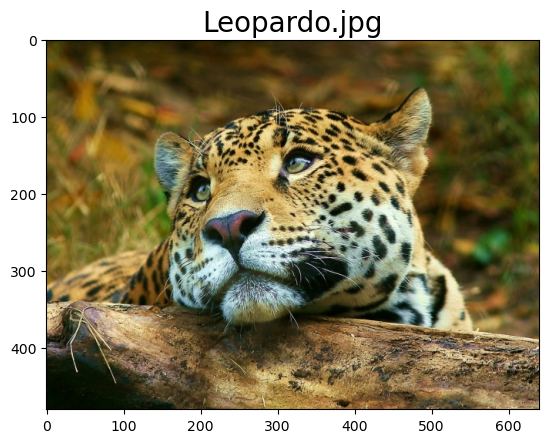

El largo de la imagen es: 480
El ancho de la imagen es: 640


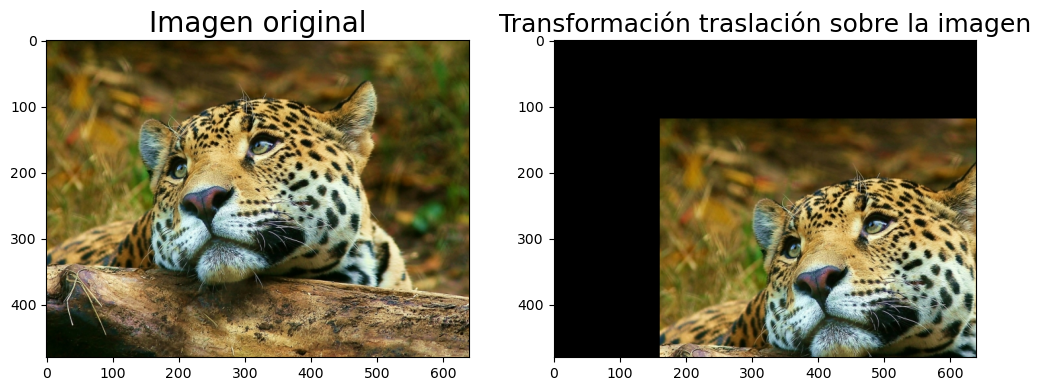

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Cargamos la imagen y la mostramos:
imagen= cv2.imread('Leopardo.jpg')
imagen= cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.title("Leopardo.jpg",fontsize=20)
plt.imshow(imagen)
plt.show()

# Definiendo las traslaciones tau:
H,W,canal=imagen.shape
print(f"El largo de la imagen es: {H}")
print(f"El ancho de la imagen es: {W}")
Tx=W/4
Ty=H/4

# Definimos la matriz 2x3 de traslación de acuerdo a la teoría anterior y al formato de cv2.warpAffine:
T=np.float32([[1, 0, Tx], [0, 1, Ty]]) #cv2.warpAffine espera una matriz de formato float32

# Aplicamos la transformación traslación a la imagen bajo estos datos:
Traslación_imagen= cv2.warpAffine(imagen, T, (W,H))

#Mostramos la transformación:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen original', fontsize = 20)
plt.subplot(122)
plt.imshow(Traslación_imagen)
plt.title('Transformación traslación sobre la imagen', fontsize = 18)
plt.show()

# $\blacksquare$ Rotación sobre Leopardo.jpg:

### Usaremos la función *cv2.getRotationMatrix2D* (además *cv2.warpAffine*), la cual recibe cv2.getRotationMatrix2D( punto $(x,y)$ alrededor del que se rota la imagen , ángulo de rotación en grados , factor de escala que aumenta o disminuye el tamaño de la imagen después de la rotación ).

### Vamos a tomar el centro del sistema como el punto de rotación, un ángulo de $90°$ y un factor de escala de 1 que preserva el tamaño original.

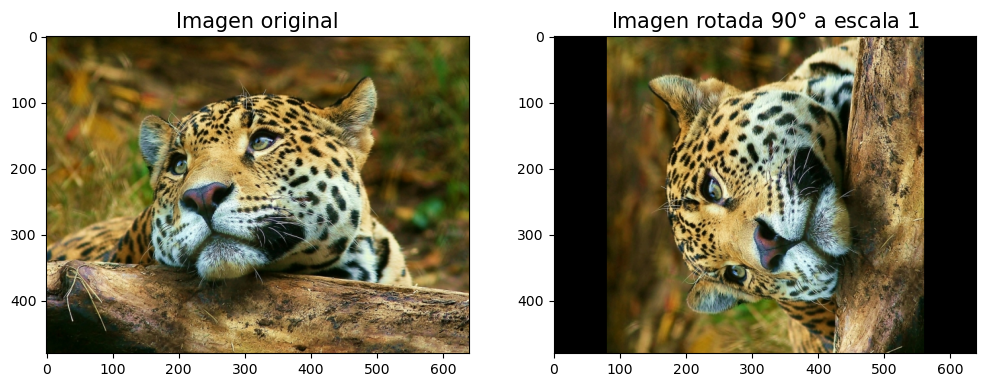

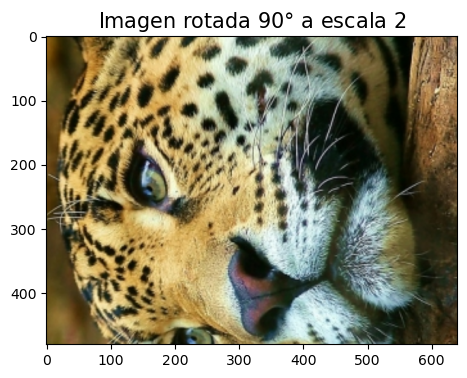

In [17]:
#Transformación rotación:
centro=(W/2 , H/2)
ángulo=90
factor_escala=1
R=cv2.getRotationMatrix2D(centro,ángulo,factor_escala)

#Aplicación de la rotación a la imagen:
Rotación_imagen= cv2.warpAffine(imagen, R, (W,H))

#Display de la rotación:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen original', fontsize = 15)
plt.subplot(122)
plt.imshow(Rotación_imagen)
plt.title("Imagen rotada $90°$ a escala 1", fontsize = 15)
plt.show()

#Si lo hacemos al doble del factor escala:
escala2=2
R2=cv2.getRotationMatrix2D(centro,ángulo,escala2)
Rotación_imagen2= cv2.warpAffine(imagen, R2, (W,H))
plt.figure(figsize=(10,4))
plt.imshow(Rotación_imagen2)
plt.title("Imagen rotada $90°$ a escala 2", fontsize = 15)
plt.show()


# $\blacksquare$ Escalamiento sobre Leopardo.jpg:

### Se utilizará la función *cv2.resize*, cuyos argumentos recibidos son: *cv2.resize( imagen , escalamiento en formato en formato $(W,H)$ o dos factores de escala para largo y ancho $f_x$ $f_y$ , método de interpolación para la calidad de imagen )*

### Vamos a hacer tres procesos:

### <span style="font-family: 'Verdana'; color: red;"> $a)$ Escalamiento a una altura y un ancho particular: Vamos a escalar la imagen al orden de  $500 \times 740$. </span>  

### <span style="font-family: 'Verdana'; color: blue;"> $b)$ Acercamiento: Vamos a aplicar un factor de escala de zoom $2$x homogéneamente. </span> 

### <span style="font-family: 'Verdana'; color: green;"> $c)$ Encogimiento: Análogamebte a $b)$, vamos ahora a aplicar un factor de escala para alejar la imagen de $0.5$x homogéneamente . </span> 

El tamaño de la imagen es de: 
 Altura 480 y Ancho 640 


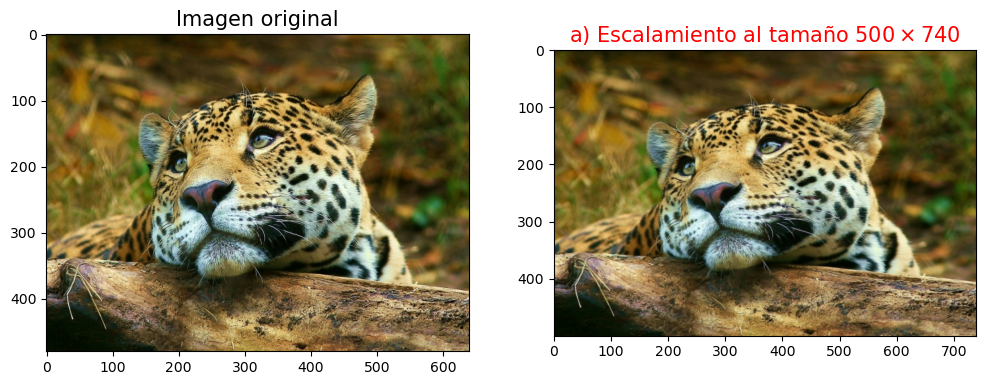

La imagen después del primer escalamiento es de orden:
 (500, 740, 3)


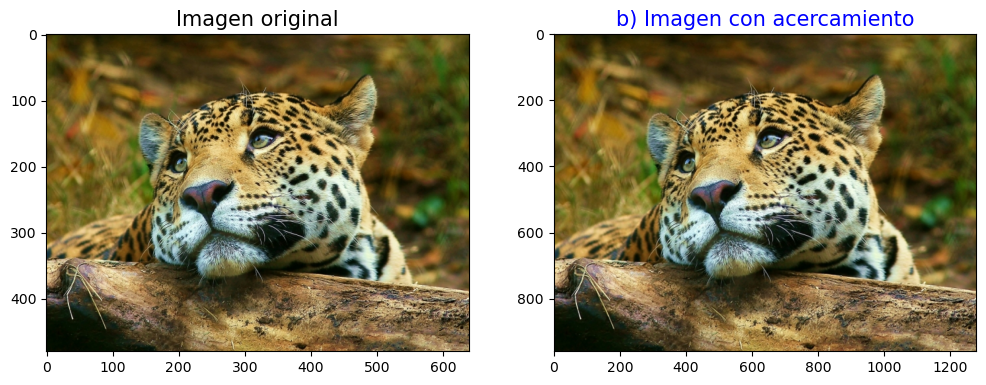

La imagen después del zoom es de orden:
 (960, 1280, 3)


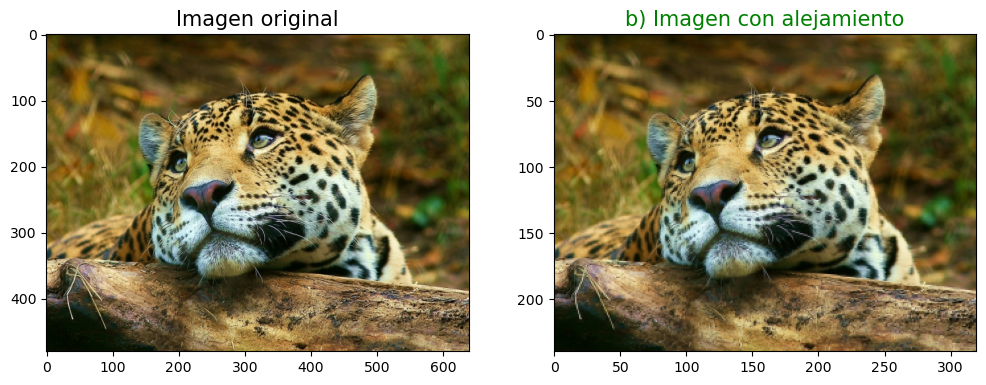

La imagen después del alejamiento es de orden:
 (240, 320, 3)


In [41]:
# a)
print(f"El tamaño de la imagen es de: \n Altura {H} y Ancho {W} ")
escalamiento1=cv2.resize(imagen,(740,500))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen original', fontsize = 15)
plt.subplot(122)
plt.imshow(escalamiento1)
plt.title(r"a) Escalamiento al tamaño $500 \times 740$", fontsize = 15, color="red")
plt.show()
print(f"La imagen después del primer escalamiento es de orden:\n {escalamiento1.shape}")

# b)
zoom=cv2.resize(imagen,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen original', fontsize = 15)
plt.subplot(122)
plt.imshow(zoom)
plt.title("b) Imagen con acercamiento", fontsize = 15, color="b")
plt.show()
print(f"La imagen después del zoom es de orden:\n {zoom.shape}")

# c)
shrink=cv2.resize(imagen, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen original', fontsize = 15)
plt.subplot(122)
plt.imshow(shrink)
plt.title("b) Imagen con alejamiento", fontsize = 15, color="g")
plt.show()
print(f"La imagen después del alejamiento es de orden:\n {shrink.shape}")

# $\blacksquare$ Recorte sobre Leopardo.jpg:

### Se define una región rectangular, un conjunto de pixeles coordenados en cuyo conjunto complemento se va a presentar la tranformación corte. 

### Para definir el rectángulo se utiliza la función *cv2.rectangle* que recibe *cv2.rectangle( imagen , coordenada del vértice superior izquierdo del rectángulo , coordenada del vértice inferior derecho del rectángulo , formato de color del rectángulo , espesor del borde del rectángulo )*.

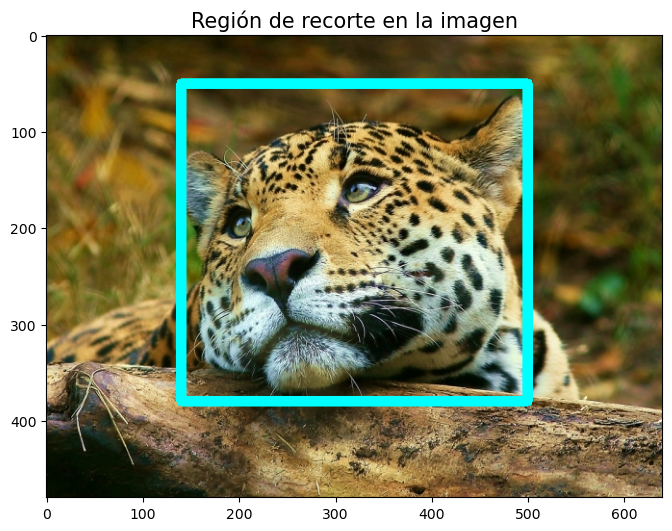

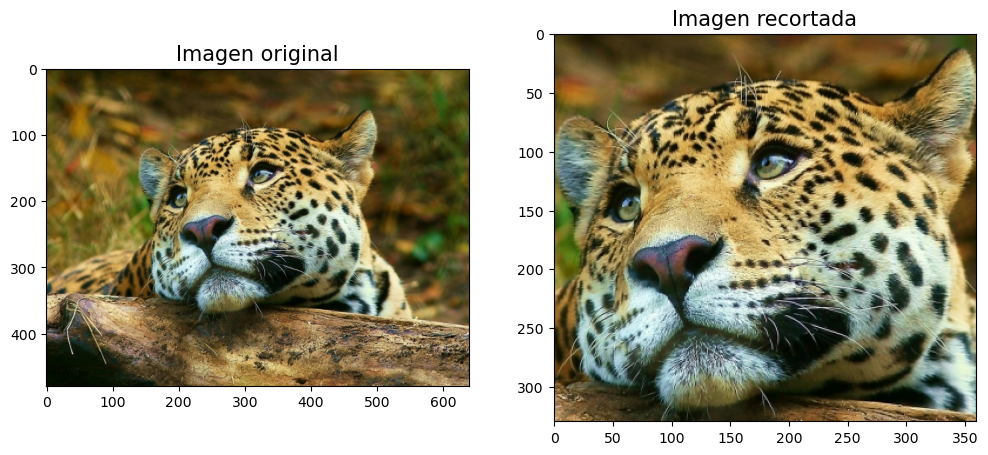

In [57]:
# Definimos los vértices (x1,y1) y (x2,y2), con base al tamaño de la imagen:
x1 = 50
x2 = 380
y1 = 140
y2 = 500

# Mostrando el rectángulo sobre la imagen:
leopardo_clon=imagen.copy()
leopardo_clon=cv2.rectangle(leopardo_clon, (y1,x1), (y2,x2), (0, 255, 255), 10)
plt.figure(figsize=(12,6))
plt.imshow(leopardo_clon)
plt.title("Región de recorte en la imagen", fontsize = 15) # Lo de adentro del rectángulo es la región que quedará mostrándose, lo de afuera es el complemento.
plt.show()

# Transformación corte. Mostramos la imagen definida con base a la región:
recorte=imagen[x1:x2 , y1:y2]
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(imagen)
plt.title('Imagen original', fontsize = 15)
plt.subplot(122)
plt.imshow(recorte)
plt.title("Imagen recortada", fontsize = 15)
plt.show()

# Fin del ejercicio.

### Bibliografía recomendada:

### $\blacksquare$ Wolberg, G. (1990). Digital image warping. IEEE.

### $\blacksquare$ Gonzalez, R. C., & Woods, R. E. (2008). Digital image processing (3rd ed.). Pearson.

### $\blacksquare$ Arfken, G. B., & Weber, H. J. (2013). Mathematical methods for physicists (4th ed.). Academic Press.